# The Chinook Database 

The Chinook database is provided as a SQLite database file called chinook.db. A copy of the database schema is below - you'll need to come back to this step often to consult the schema as you write your queries.
This purpose of this project is to answer business questions with the following skills:

- Write a SQL query to extract the relevant data
- Create plots where necessary to visualize the data
- Drawing conclusions and explaining the data and/or visualizations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import sqlite3 

db = 'chinook.db'

def run_query(q):
    # To use the built-in sqlite connection as context manager
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
def run_command(q):
    # To run SQL queries that don't return tables
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)
def show_tables():
    # To return a list of all tables and views in databases
    # - to check the state of database as we work
    with sqlite3.connect(db) as conn:
        q = '''
            SELECT
                name,
                type
            FROM sqlite_master
            WHERE type IN ("table", "view")
            '''
        return run_query(q)
        
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


### Exploring Tables in the Database

We're interested in finding out which genres sell the best in the USA. First, we need to explore the tables to see how we can link the tables to enable us to extract the information that we need.

In [2]:
run_query("SELECT * FROM invoice_line")

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


In [3]:
run_query("SELECT * FROM track")

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [4]:
run_query("SELECT * FROM genre")

,genre_id,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

- Regal 	 -  Hip-Hop
- Red Tone 	-    Punk
- Meteor and the Girls 	-   Pop
- Slim Jim Bites 	-   Blues

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

In [5]:
# Query that returns each genre, with the number of tracks sold in USA
usa_genre_tracks =  '''
WITH 
    invoice_line_info AS
        (SELECT 
            il.*
            FROM invoice_line il
            LEFT JOIN invoice i ON i.invoice_id = il.invoice_id
            LEFT JOIN customer c ON c.customer_id = i.customer_id
            WHERE country = 'USA'
        ),
        
    genre_info AS
        (SELECT 
            genre_id, 
            name genre_name 
            FROM genre          
        ),
        
    track_info AS
        (SELECT 
            track_id,
            genre_id
            FROM track 
        )
        
SELECT 
    genre_name genre, 
    COUNT(ili.invoice_id) frequency, 
    ROUND((CAST(COUNT(ili.invoice_id) AS FLOAT)/(SELECT COUNT(*) from invoice_line_info )*100
    ),2) percentage
FROM invoice_line_info ili
LEFT JOIN track_info ti ON ti.track_id = ili.track_id
LEFT JOIN genre_info gi ON gi.genre_id = ti.genre_id
GROUP BY genre_name
ORDER BY frequency DESC
'''
run_query(usa_genre_tracks)

,genre,frequency,percentage
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Latin,22,2.09
7,Pop,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


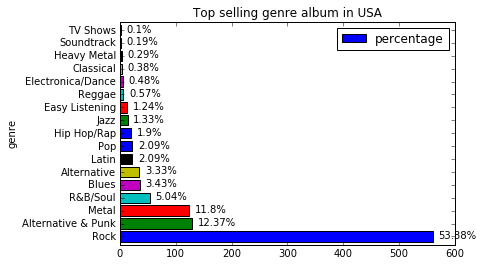

In [6]:
usa_sales_bar = run_query(usa_genre_tracks)

usa_sales_bar.plot.barh(title = 'Top selling genre album in USA', x='genre', y='frequency', label='percentage', width = 0.8)
for i, label in enumerate(list(usa_sales_bar.index)):
    score = usa_sales_bar.loc[label, "frequency"]
    label = (usa_sales_bar.loc[label, "percentage"]
            ).astype(float).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))
    
plt.show()

Based on the results above, we could recommend advertising the following artists by purchasing their albums:
- Red Tone (Punk)
- Slim Jim Bites (Blues)
- Meteor and the Girls (Pop)

If possible, the company should look for artists who produces albums in 'Rock' genre as it overwhelmingly dominates the sales in the USA.

### Analysing Sales Support Agents Performances

In [7]:
run_query('SELECT * FROM invoice')

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83
5,6,31,2017-01-10 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,1.98
6,7,49,2017-01-12 00:00:00,Ordynacka 10,Warsaw,None,Poland,00-358,10.89
7,8,59,2017-01-13 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,9.90
8,9,18,2017-01-18 00:00:00,627 Broadway,New York,NY,USA,10012-2612,8.91
9,10,31,2017-01-18 00:00:00,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,1.98


In [8]:
sales_perf = '''

SELECT e.first_name || " " || e.last_name employee_name, e.hire_date, SUM(i.total) total_sales, ROUND(SUM(i.total)/COUNT(c.customer_id),2) mean_sales, COUNT(c.customer_id) no_of_sales from invoice i
INNER JOIN customer c ON c.customer_id = i.customer_id
INNER JOIN employee e ON e.employee_id = c.support_rep_id
GROUP BY employee_name

'''

run_query(sales_perf)

,employee_name,hire_date,total_sales,mean_sales,no_of_sales
0,Jane Peacock,2017-04-01 00:00:00,1731.51,8.17,212
1,Margaret Park,2017-05-03 00:00:00,1584.00,7.40,214
2,Steve Johnson,2017-10-17 00:00:00,1393.92,7.41,188


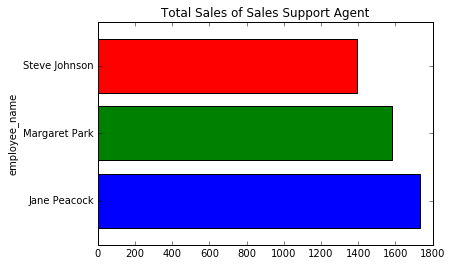

In [9]:
sales_perf_plot = run_query(sales_perf)
sales_perf_plot.plot.barh(title = 'Total Sales of Sales Support Agent', x='employee_name', y='total_sales',width = 0.8, legend = False)

plt.show()

Jane has made the most total sales and highest mean sales. Although we need to consider that Jane is the longest serving member in the list. Steve entered the company 5 months later than Margaret but his mean sales matched Margaret's.

### Analysing Sales from Different Countries

In [10]:
sales_per_country = '''
WITH country_or_other AS
    (SELECT
       CASE
           WHEN (SELECT count(*)
                 FROM customer
                 where country = c.country) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       i.*
       
     FROM invoice i 
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    average_sales_customer
FROM
    (
    SELECT
        country,
        COUNT(DISTINCT customer_id) customers,
        SUM(total) total_sales,
        SUM(total) / COUNT(DISTINCT invoice_id) average_order,
        SUM(total) / COUNT(DISTINCT customer_id) average_sales_customer,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''
run_query(sales_per_country)

,country,customers,total_sales,average_order,average_sales_customer
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


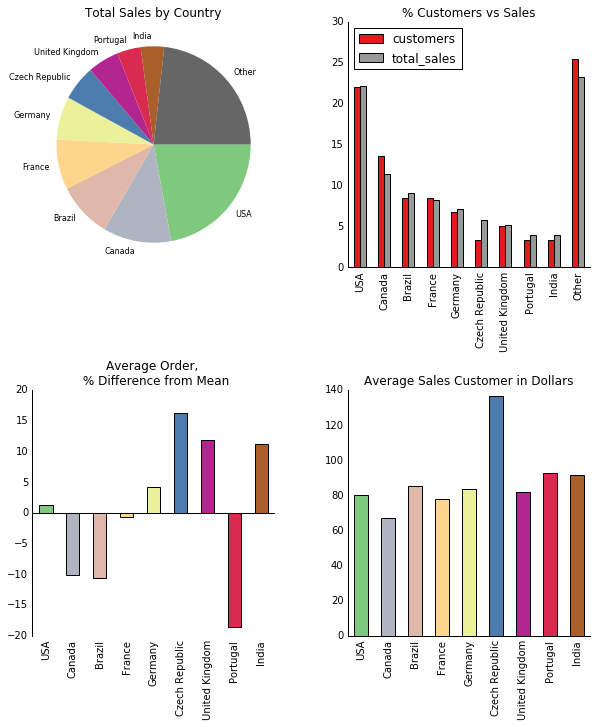

In [11]:
visualise_sales_per_country = run_query(sales_per_country)
visualise_sales_per_country.set_index("country", drop=True, inplace=True)
# To give more options for colors than the standard colors when plotting
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, visualise_sales_per_country.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 11))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)


# Pie Chart  for total sales
visualise_sales_per_country['total_sales'].copy().rename('').plot.pie(
    ax=ax1,
    startangle=0,
    counterclock=False,
    title='Total Sales by Country',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0},
)

# % Bar Plot for Customer vs Total_sales
cvs_cols = ["customers","total_sales"]
custs_vs_sales = visualise_sales_per_country[cvs_cols].copy()
# Remove index for country
custs_vs_sales.index.name = ''
# calculate % for customers and total_sales separately
# for each country, customer/customer.sum *100 
# then total_sales/total_sales.sum *100
for c in cvs_cols:
    # custs_vs_sales = custs_vs_sales / (custs_vs_sales.sum / 100)
    #                = (custs_vs_sales / custs_vs_sales.sum)  * 100
    custs_vs_sales[c] /= custs_vs_sales[c].sum() / 100
    
custs_vs_sales.plot.bar(
                        ax=ax2,
                        colormap=plt.cm.Set1,
                        title="% Customers vs Sales")

ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

# Average Order Bar Plot
avg_order = visualise_sales_per_country["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = (avg_order / avg_order.mean() * 100 ) - 100
# Drop 'Other' as it includes different countries
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order, \n % Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
# Add a horizontal line across the axis.
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# Bar Plot for Average Sales per Customer
asc = visualise_sales_per_country["average_sales_customer"].copy()
asc.index.name = ''
asc.drop("Other",inplace=True)
asc.plot.bar(
    ax=ax4,
    color=colors,
    title="Average Sales Customer in Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

#### Findings

Czech Republic seems like a good option for the company to invest in as the average order is the highest compared to other countries. Also, the average sales for each customer is also the highest. 

United Kingdom is also a good choice along with India as the average order are relatively high. We need to bear in mind that the amount of data used in this analysis is quite small so we should gather more data to compare with our results to confirm our findings.

### Individual Tracks vs Albums


In [12]:
run_query('SELECT invoice_id, track_id FROM invoice_line LIMIT 10')

,invoice_id,track_id
0,1,1158
1,1,1159
2,1,1160
3,1,1161
4,1,1162
5,1,1163
6,1,1164
7,1,1165
8,1,1166
9,1,1167


In [13]:
run_query('SELECT album_id, track_id  FROM track LIMIT 20')

,album_id,track_id
0,1,1
1,1,6
2,1,7
3,1,8
4,1,9
5,1,10
6,1,11
7,1,12
8,1,13
9,1,14


In [14]:
trackvsalbum = '''
WITH invoice_track AS
    (
    SELECT 
        invoice_id, 
        MIN(track_id) track_id,
        COUNT(track_id) total_invoice_tracks
    FROM invoice_line
    GROUP BY invoice_id 
    ),

album_track AS
    (
    SELECT 
        album_id, 
        MIN(track_id) album_track_id,
        COUNT(track_id) total_album_tracks 
    FROM track
    GROUP BY album_id
    ),

album_invoice_track AS
    (
    SELECT 
        CASE 
            WHEN total_invoice_tracks = total_album_tracks
            AND album_track_id = track_id
            THEN 'yes'
            ELSE 'no'
            END AS album_purchase,
        COUNT(*) number_of_invoices,
        CAST(COUNT(*) AS FLOAT)/CAST((SELECT COUNT(*) FROM invoice) AS FLOAT)*100 percentage
        FROM invoice_track it
        LEFT JOIN album_track at 
        ON at.album_track_id = it.track_id
        GROUP BY album_purchase
        
    )

SELECT * from album_invoice_track

'''

run_query(trackvsalbum)

,album_purchase,number_of_invoices,percentage
0,no,498,81.107492
1,yes,116,18.892508


Album purchases account for 18.9% of purchases. Based on this result, I would recommend against purchasing only select tracks from albums from record companies, since a fifth of sales are from entire album so the company can potentially lose about 20% revenue.